In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [25]:
train = pd.read_csv("/content/gdrive/MyDrive/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/MyDrive/ua.test", sep="\t", names=['user','movie','rating','timestamp'])

In [26]:
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [27]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

In [28]:
optimizer = torch.optim.Adam([P, Q], lr=0.1)

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch%100==0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))


epoch: 0, cost: 24.017765
epoch: 100, cost: 0.560513
epoch: 200, cost: 0.491392
epoch: 300, cost: 0.469141
epoch: 400, cost: 0.459387
epoch: 500, cost: 0.453623
epoch: 600, cost: 0.449758
epoch: 700, cost: 0.447123
epoch: 800, cost: 0.445306
epoch: 900, cost: 0.443998


In [31]:
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
optimizer = torch.optim.Adam([P, Q], lr=0.1)
X = []
Y = []

for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost.item())
  if epoch%100==0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
    

epoch: 0, cost: 23.707016
epoch: 100, cost: 0.572420
epoch: 200, cost: 0.497982
epoch: 300, cost: 0.472041
epoch: 400, cost: 0.460150
epoch: 500, cost: 0.453560
epoch: 600, cost: 0.449536
epoch: 700, cost: 0.446896
epoch: 800, cost: 0.445031
epoch: 900, cost: 0.443576


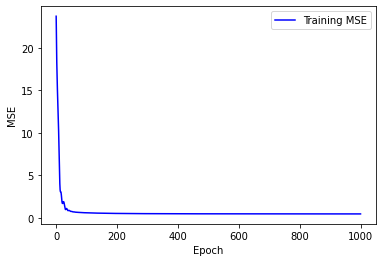

In [32]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.legend()
plt.show()

In [33]:
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
optimizer = torch.optim.Adam([P, Q], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
    if epoch%100==0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))
    

epoch: 0, cost: 23.218737
epoch: 100, cost: 0.557762
epoch: 200, cost: 0.492262
epoch: 300, cost: 0.471018
epoch: 400, cost: 0.461366
epoch: 500, cost: 0.455675
epoch: 600, cost: 0.451907
epoch: 700, cost: 0.449196
epoch: 800, cost: 0.446976
epoch: 900, cost: 0.445344


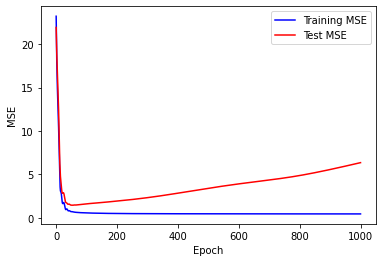

In [34]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [39]:
lambda1 = 0.0001
lambda2 = 0.0001
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
optimizer = torch.optim.Adam([P, Q], lr=0.1)
X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lambda1 * torch.sum(P**2) + lambda2 * torch.sum(Q**2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
  if epoch%100==0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 23.489431
epoch: 100, cost: 0.689260
epoch: 200, cost: 0.644231
epoch: 300, cost: 0.634384
epoch: 400, cost: 0.629845
epoch: 500, cost: 0.628073
epoch: 600, cost: 0.627447
epoch: 700, cost: 0.627161
epoch: 800, cost: 0.626987
epoch: 900, cost: 0.626852


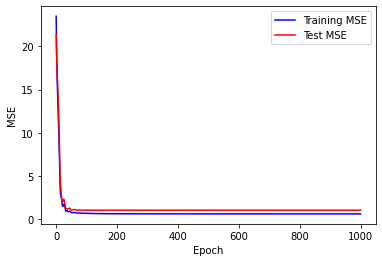

In [40]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

In [46]:
lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)
X = []
Y = []
Y_test = []
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis, ratings)
  loss = cost + lambda1 + torch.sum(P**2) + lambda2 * torch.sum(Q**2) + lambda3 * torch.sum(bias_item**2) + lambda4 * torch.sum(bias_user**2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  X.append(epoch)
  Y.append(cost.item())
  with torch.no_grad():
    hypo_test = (P[items_test] * Q[users_test]).sum(dim=1) + mean + bias_user[users_test] + bias_item[items_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
  if epoch%100==0:
    print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 13.758552
epoch: 100, cost: 0.942085
epoch: 200, cost: 0.942061
epoch: 300, cost: 0.942060
epoch: 400, cost: 0.942060
epoch: 500, cost: 0.942060
epoch: 600, cost: 0.942060
epoch: 700, cost: 0.942060
epoch: 800, cost: 0.942060
epoch: 900, cost: 0.942060


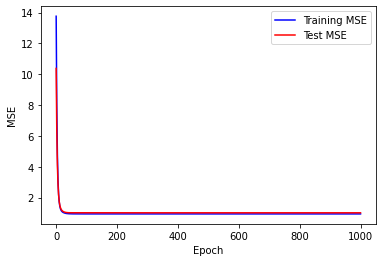

In [47]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X, Y, c="blue", label="Training MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()